In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-games-sale/video games sales.csv


In [2]:
df = pd.read_csv("/kaggle/input/video-games-sale/video games sales.csv")

In [3]:
features = ["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
x = df[features]
y = df["Global_Sales"]

In [4]:
le = LabelEncoder()
genre_encoded = le.fit_transform(x["Genre"])

In [5]:
x = pd.concat([x.drop("Genre", axis=1), pd.DataFrame(genre_encoded, columns=["Genre Encoded"])], axis=1)

In [6]:
pd.concat([x, y], axis=1).corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre Encoded,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.017435,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.016481,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.030085,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.009731,0.748331
Genre Encoded,0.017435,0.016481,0.030085,0.009731,1.000000,0.021671
Global_Sales,0.941047,0.902836,0.611816,0.748331,0.021671,1.000000


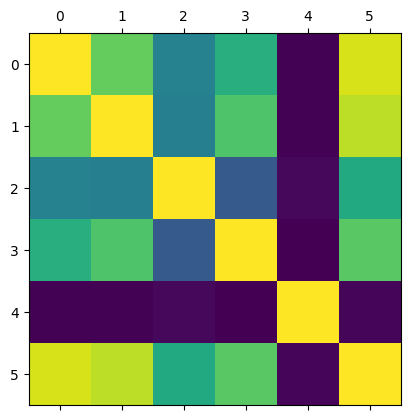

In [7]:
plt.matshow(pd.concat([x, y], axis=1).corr())
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=x["Genre Encoded"])

In [9]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [10]:
pred = reg.predict(x_test)

In [11]:
mean_absolute_error(y_test, pred)

0.0029198869898581724

In [12]:
y_test

5035     0.38
1979     1.05
9370     0.13
13890    0.04
11633    0.08
         ... 
7349     0.21
9907     0.12
3321     0.61
13038    0.05
15000    0.02
Name: Global_Sales, Length: 3320, dtype: float64

In [13]:
mean_absolute_error(y_test,pred)

0.0029198869898581724